# Spam Text Classification

- N-Gram, Bi-gram
- Bag of Words (Bow)
- Term Frequency Calculation TF
- Inverse Document Frequency IDF
- TFIDF
- Text Classification

### N-Gram for **please turn your page**

Unigram: please | turn | your | page

Bigram: please turn | turn your | your page

Trigram: please turn your | turn your page


### Bag of Words (BoW)

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval. Мешок слов — представление текста в виде массива, состоящего из отдельных слов и количества их использования.

(1) Иван любит смотреть фильмы. Мария тоже любит фильмы.
(2) Иван также любит смотреть футбольные матчи.

«Иван», «любит», «смотреть», «фильмы», «Мария», «тоже», «любит», «фильмы»
«Иван», «также», «любит», «смотреть», «футбольные», «матчи»


 BoW1 = { "Иван" : 1, "любит" : 2, "смотреть" : 1, "фильмы" : 2, "Мария" : 1, "тоже" : 1 }; 
 
 BoW2 = { "Иван" : 1, "также" : 1, "любит" : 1, "смотреть" : 1, "футбольные" : 1, "матчи" : 1 };

### Term Frequency (TF)
Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence. 

*Если документ содержит 100 слов, и слово[3] «заяц» встречается в нём 3 раза, то частота слова (TF) для слова «заяц» в документе будет 0,03 (3/100).*

### IDF (inverse document frequency — обратная частота документа) 

— инверсия частоты, с которой некоторое слово встречается в документах коллекции. Основоположником данной концепции является Карен Спарк Джонс.

*Вычислим IDF как десятичный логарифм отношения количества всех документов к количеству документов, содержащих слово «заяц». Таким образом, если «заяц» содержится в 1000 документах из 10 000 000 документов, то IDF будет равной: log(10 000 000/1000) = 4.*


### TF-IDF (от англ. TF — term frequency, IDF — inverse document frequency) 

— статистическая мера, используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. Вес некоторого слова пропорционален частоте употребления этого слова в документе и обратно пропорционален частоте употребления слова во всех документах коллекции.

*Для расчета окончательного значения веса слова необходимо TF умножить на IDF. В данном примере, TF-IDF вес для слова «заяц» в выбранном документе будет равен: 0,03 × 4 = 0,12.*

## Coding

### Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download
df  = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df.shape

(5572, 4)

In [6]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

### Dataset Balancing

In [7]:
ham = df[df['label'] == 'ham']
ham.shape

(4825, 4)

In [8]:
ham

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2
...,...,...,...,...
5565,ham,Huh y lei...,12,3
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [9]:
spam = df[df['label'] == 'spam']
spam.shape

(747, 4)

In [10]:
# Эта строка берет из объекта ham случайную выборку строк (или элементов) размером, равным количеству строк (или элементов) в объекте spam.
ham = ham.sample(spam.shape[0])
ham

,label,message,length,punct
3057,ham,Webpage s not available!,24,1
3779,ham,Once a fishrman woke early in d mrng. It was v...,301,15
1034,ham,"OH MR SHEFFIELD! You wanna play THAT game, oka...",127,9
785,ham,Dont think so. It turns off like randomlly wit...,65,1
4946,ham,Anyway I don't think I can secure anything up ...,107,2
...,...,...,...,...
3970,ham,Thanks for your message. I really appreciate y...,202,7
2817,ham,Genius what's up. How your brother. Pls send h...,68,4
927,ham,But I'm on a diet. And I ate 1 too many slices...,92,5
4747,ham,Orh i tot u say she now still dun believe.,42,1


In [11]:
ham.shape

(747, 4)

In [12]:
data = pd.concat([ham,spam],axis=0,ignore_index=True)

In [13]:
data.shape

(1494, 4)

In [14]:
data.sample(10)

,label,message,length,punct
107,ham,I want snow. It's just freezing and windy.,42,3
507,ham,So when do you wanna gym?,25,1
1326,spam,Natalja (25/F) is inviting you to be her frien...,136,12
1289,spam,"Thanks for your ringtone order, reference numb...",156,4
801,spam,Here is your discount code RP176781. To stop f...,129,6
224,ham,Captain is in our room:),24,2
66,ham,Captain vijaykanth is doing comedy in captain ...,66,4
918,spam,For taking part in our mobile survey yesterday...,156,6
491,ham,K.k:)apo k.good movie.,22,5
1271,spam,Refused a loan? Secured or Unsecured? Can't ge...,114,8


### Exploratory Data Analysis

In [15]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 4)
plt.style.use('ggplot')

In [16]:
ham.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

Ось X (абсцисса):

ham['length'] и spam['length']: На оси X отображаются длины сообщений (количество символов или слов в каждом сообщении). Эти данные содержатся в колонке length для категорий HAM (не спам) и SPAM (спам).

Ось Y (ордината):

На оси Y показано количество сообщений (частота) для каждой длины в пределах каждого интервала (или "корзины", bin).
Каждый интервал определяется количеством корзин (bins=100) — длины сообщений делятся на 100 интервалов, и для каждого подсчитывается, сколько сообщений попало в этот диапазон.

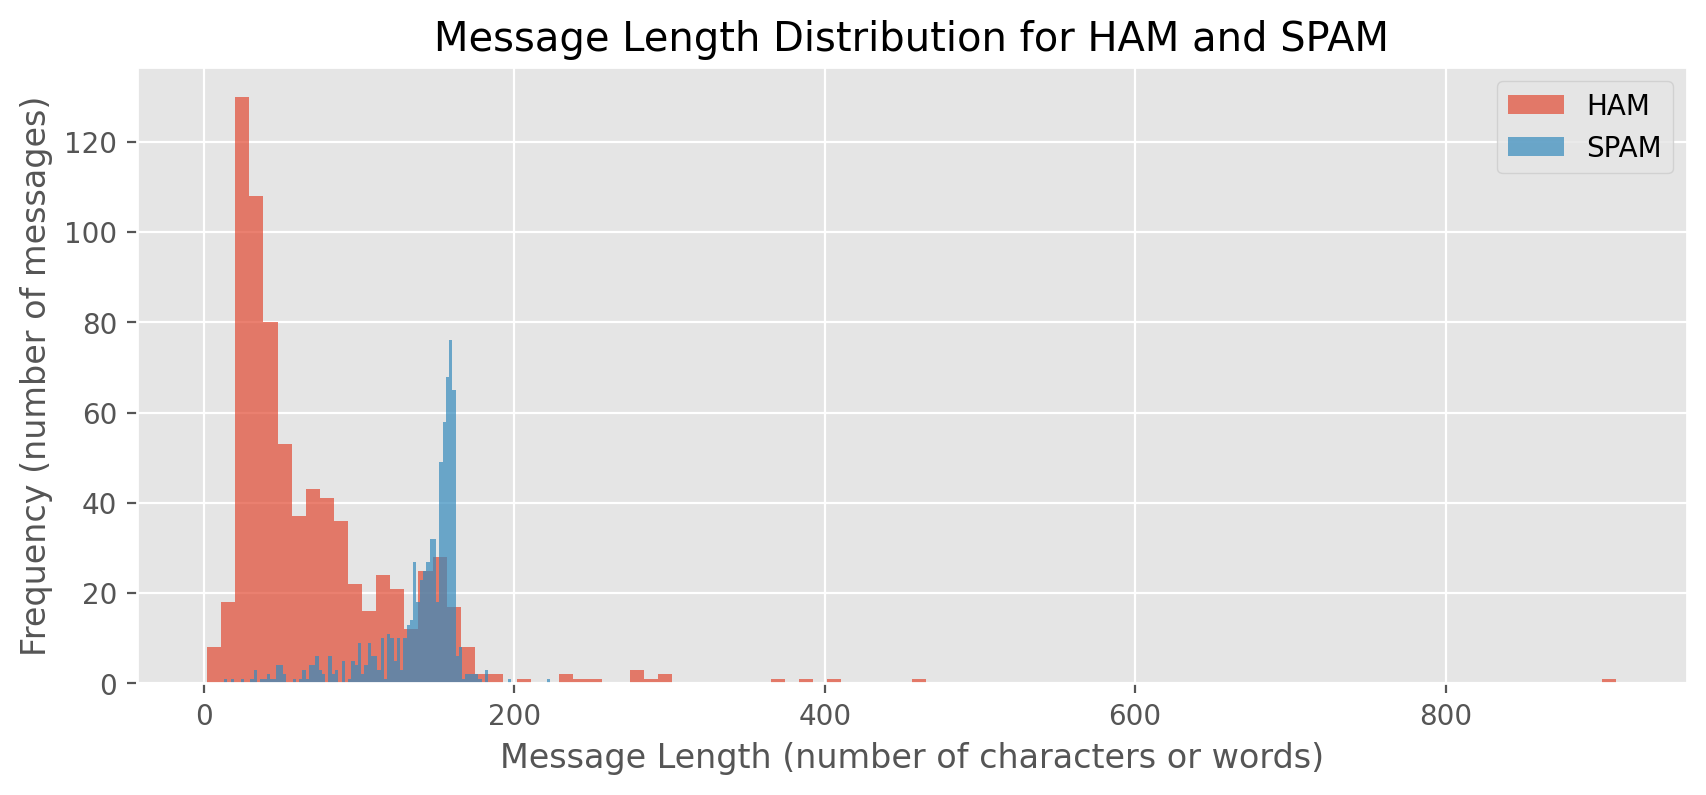

In [20]:
plt.hist(ham['length'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['length'], bins=100, alpha=0.7, label='SPAM')

# Заголовок графика
plt.title('Message Length Distribution for HAM and SPAM')

# Подписи осей
plt.xlabel('Message Length (number of characters or words)')  # Подпись оси X
plt.ylabel('Frequency (number of messages)')  # Подпись оси Y

# Легенда
plt.legend()

# Отображение графика
plt.show()

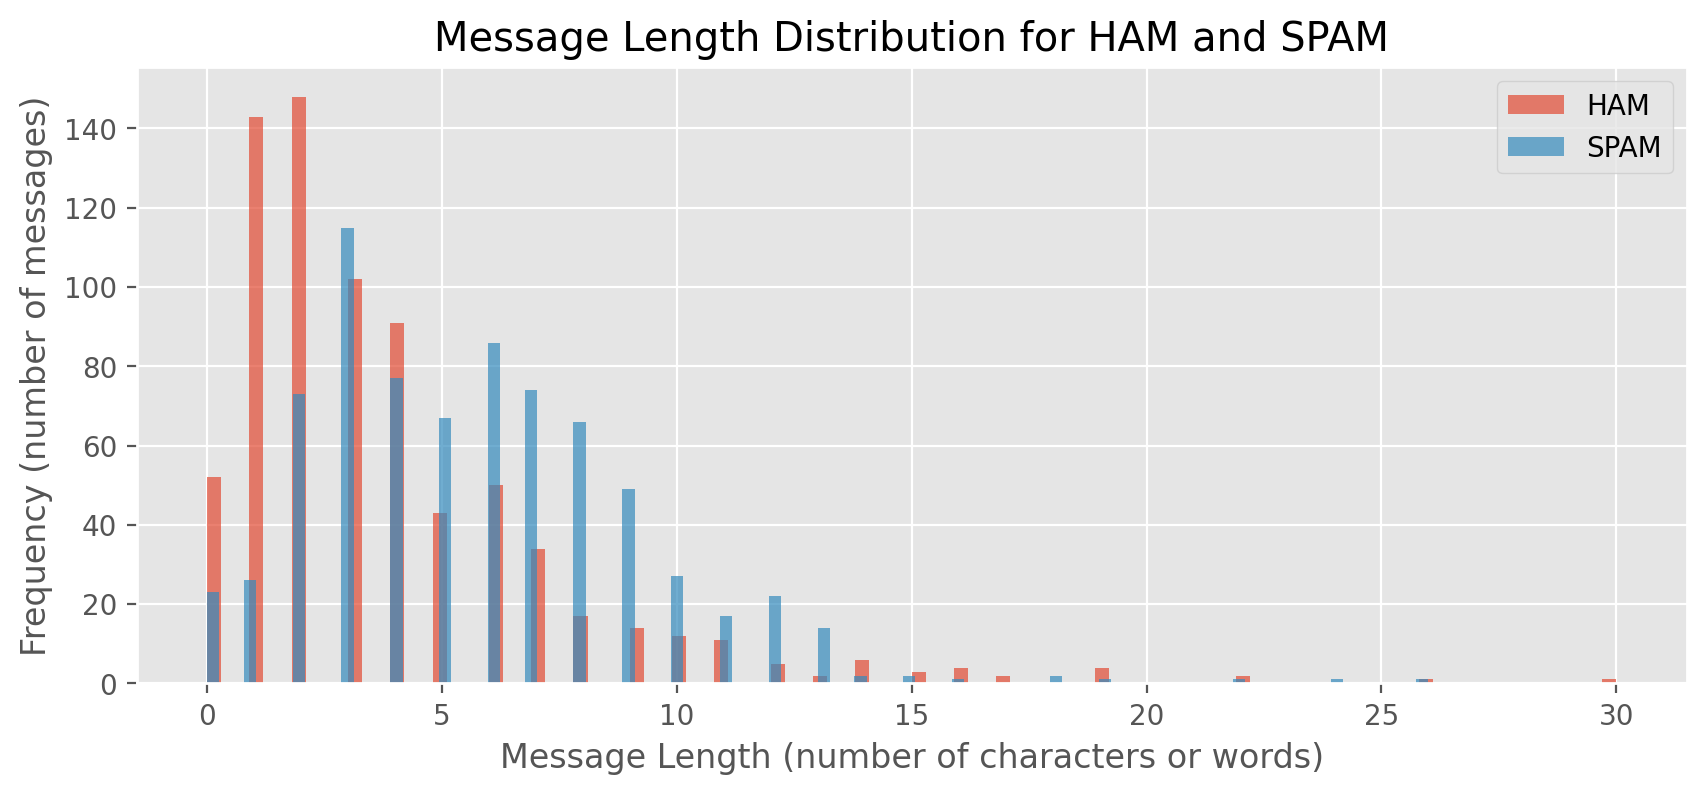

In [21]:
plt.hist(ham['punct'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['punct'], bins=100, alpha=0.7, label='SPAM')

# Заголовок графика
plt.title('Message Length Distribution for HAM and SPAM')

# Подписи осей
plt.xlabel('Message Length (number of characters or words)')  # Подпись оси X
plt.ylabel('Frequency (number of messages)')  # Подпись оси Y

# Легенда
plt.legend()

# Отображение графика
plt.show()

### Data Preparation for Training

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

```
- data['message']: Входные данные (например, тексты сообщений).
- data['label']: Метки классов (например, HAM/SPAM), которые модель должна предсказать.
- test_size=0.2: Указывает, что 20% данных нужно выделить для тестовой выборки, а оставшиеся 80% — для обучения.
- random_state=42: Фиксирует случайность, чтобы результаты разбиения данных были воспроизводимыми (независимо от запуска кода).
- shuffle=True: Перемешивает данные перед разбиением, чтобы они не оставались в изначальном порядке.
- stratify=data['label']: Гарантирует, что пропорции классов (например, доля HAM и SPAM) в обучающей и тестовой выборках останутся такими же, как в исходных данных.
```

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data['message'],
                                                    data['label'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=data['label'])
X_train.shape, X_test.shape

((1195,), (299,))

Pipeline позволяет объединить обработку текста и обучение модели в единую структуру.

Шаги:
- 'tfidf' — Преобразование текста в числовые признаки: Слова, часто встречающиеся в тексте, но редко в других текстах, получают высокий вес.

- 'rfc' — Классификация с помощью случайного леса: 
    - RandomForestClassifier — модель, которая использует ансамбль решающих деревьев для классификации данных.
    - n_estimators=100: Создаются 100 деревьев в лесу.
    - n_jobs=-1: Используются все доступные процессоры для параллельной обработки, что ускоряет обучение.




In [24]:
spam = Pipeline([('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
spam.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [25]:
y_pred = spam.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.95       150
        spam       0.99      0.92      0.95       149

    accuracy                           0.95       299
   macro avg       0.96      0.95      0.95       299
weighted avg       0.96      0.95      0.95       299



а) Precision (Точность):
    - Это доля сообщений, классифицированных как данный класс, которые действительно принадлежат этому классу. Например, для spam точность 0.99 означает, что почти все сообщения, которые модель классифицировала как спам, действительно являются спамом.

б) Recall (Полнота):
    - Это доля сообщений данного класса, которые модель правильно нашла. Например, для ham полнота 0.99 означает, что почти все не спам сообщения модель правильно классифицировала.

в) F1-Score:
    - Это среднее значение точности и полноты, рассчитанное так, чтобы учесть баланс между ними. F1-score = 0.95 для обоих классов означает, что модель хорошо сбалансирована между точностью и полнотой.

г) Support (Поддержка):
    - Это количество реальных примеров каждого класса в тестовой выборке. В данном случае: ham: 150 сообщений и spam: 149 сообщений.

д) Accuracy (Точность классификации): В данном случае, точность = 0.95, что означает, что модель правильно классифицировала 95% сообщений.

е) Macro Avg (Макро среднее): Средние значения точности, полноты и F1-Score для всех классов, рассчитанные как арифметическое среднее без учета веса (т.е. каждый класс учитывается равномерно).

ж) Weighted Avg (Взвешенное среднее): Средние значения точности, полноты и F1-Score для всех классов, взвешенные в зависимости от количества примеров каждого класса (support). Это более релевантная метрика, если классы несбалансированы.

In [27]:
spam.predict(['you have won lottery ticket worth $1000, please click here to claim',
            'hi, how are you doing today?'])

array(['spam', 'ham'], dtype=object)

In [28]:
spam.classes_

array(['ham', 'spam'], dtype=object)

### Save and Load Model

In [29]:
import pickle

pickle.dump(spam, open('model.pkl', 'wb'))

In [30]:
model = pickle.load(open('model.pkl', 'rb'))

In [31]:
model.predict(['you have won lottery ticket worth $1000, please click here to claim',
            'hi, how are you doing today?'])

array(['spam', 'ham'], dtype=object)